This is the Group 9 Project Report ipynb File!

The following cell loads the packages that we will be using for this project

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(infer)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

This cell will import our data from a link. The link is a public GitHub created by Ryan as the link directly from the source was a .zip file. The GitHub allows us to get around this problem

In [2]:
url <- "https://raw.githubusercontent.com/EPICxFLIPPER/data/main/OnlineNewsPopularity.csv"
popularity <- read_csv(url) 

head(popularity)

Rows: 39644 Columns: 61
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): url
dbl (60): timedelta, n_tokens_title, n_tokens_content, n_unique_tokens, n_no...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,⋯,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,⋯,0.10000000,0.7,-0.3500000,-0.600,-0.2000000,0.5000000,-0.1875000,0.00000000,0.1875000,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.6047431,1,0.7919463,3,1,1,⋯,0.03333333,0.7,-0.1187500,-0.125,-0.1000000,0.0000000,0.0000000,0.50000000,0.0000000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.5751295,1,0.6638655,3,1,1,⋯,0.10000000,1.0,-0.4666667,-0.800,-0.1333333,0.0000000,0.0000000,0.50000000,0.0000000,1500
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731,9,531,0.5037879,1,0.6656347,9,0,1,⋯,0.13636364,0.8,-0.3696970,-0.600,-0.1666667,0.0000000,0.0000000,0.50000000,0.0000000,1200
http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.4156456,1,0.5408895,19,19,20,⋯,0.03333333,1.0,-0.2201923,-0.500,-0.0500000,0.4545455,0.1363636,0.04545455,0.1363636,505
http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,0.5598886,1,0.6981982,2,2,0,⋯,0.13636364,0.6,-0.1950000,-0.400,-0.1000000,0.6428571,0.2142857,0.14285714,0.2142857,855


The next cell wrangles our data. This data was already quite tidy, only a few null values had to be removed. We also selected our predictor, word count, and the column being predicted, shares. Through our exploritory analysis, there were quite a few outlier points, both that had high shares, and high word counts. We have also removed a significant number of these points below.

In [3]:
set.seed(9)
#Wrangling
popularity_tidy <- popularity |> 
#removing columns that are specifically not litsted as predictors as well as columns that self reference articles.
select(-url, -timedelta) |>
select(n_tokens_title:average_token_length, shares) |>
filter(shares < 5000)|>
arrange(desc(shares)) |>

drop_na(n_tokens_content:shares)
#Removed Outliers


head(popularity_tidy)

n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,shares
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,214,0.6445498,1,0.7519380,2,1,0,1,4.654206,4900
8,701,0.4985423,1,0.6610169,8,8,12,0,4.693295,4900
10,488,0.4804928,1,0.5815385,3,3,11,0,4.737705,4900
12,277,0.5818182,1,0.7215190,7,3,1,0,4.743682,4900
6,560,0.5036101,1,0.6978193,13,4,1,0,4.867857,4900
9,381,0.5329815,1,0.7203791,4,0,0,1,4.923885,4900


In [4]:
set.seed(9)
popularity_sample <- sample_n(popularity_tidy, 3000)

In [5]:
set.seed(9)
#Splitting the data into training and testing data
#Strata = the day the article was published
popularity_split<- initial_split(popularity_sample, prop = .70, strata = shares)
popularity_train<- training(popularity_split)
popularity_test <- testing(popularity_split)


In [6]:
set.seed(9)
initial_table <- popularity_train |>
map_df(mean,na.rm =TRUE)
initial_table


n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,shares
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10.47903,536.7712,0.5302624,0.970448,0.6722234,10.38322,3.371306,4.58103,1.151573,4.559611,1613.08


Warning message:
“Removed 2 rows containing missing values (geom_bar).”


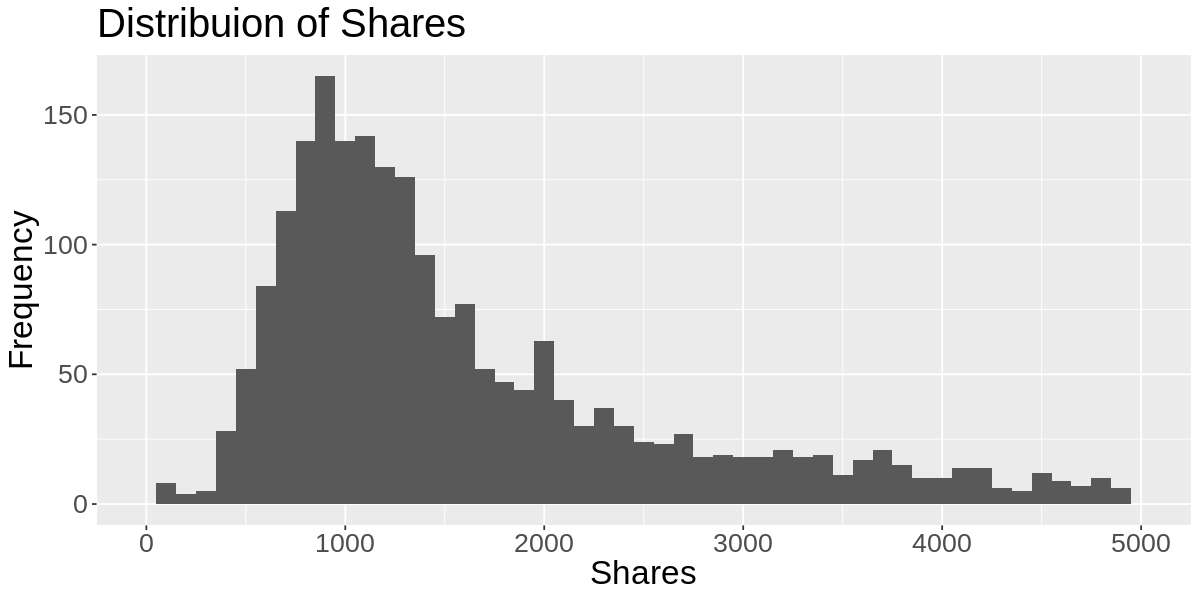

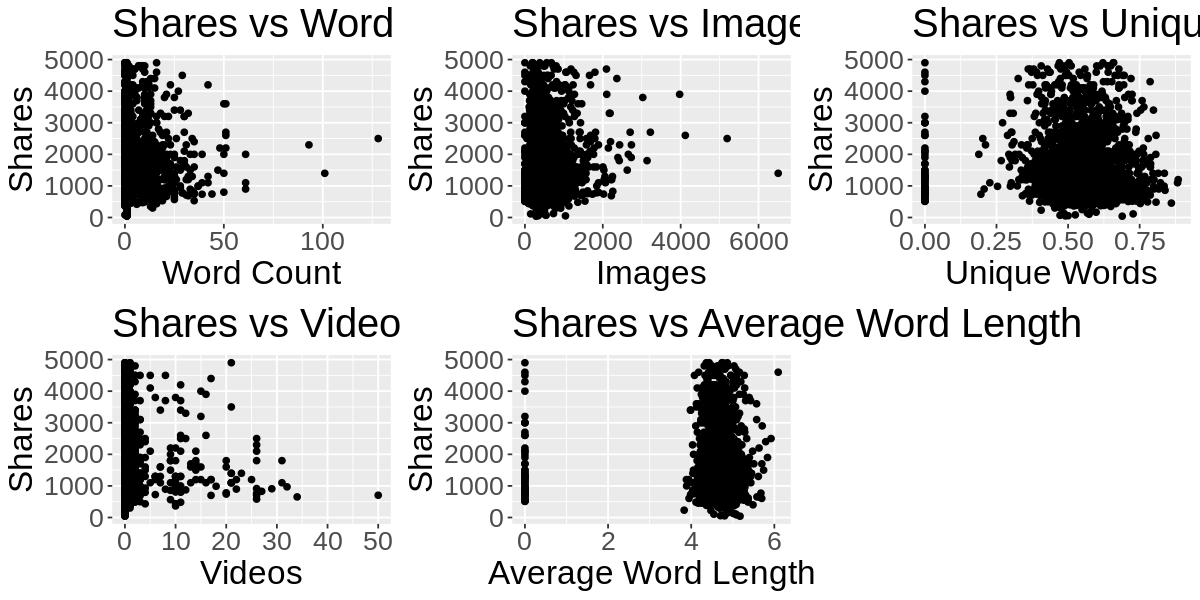

In [7]:
set.seed(9)
#Below are the distributions of the 3 most varable categoreis in our data set. Though some of the categories are less variable, we belive 
#they will still be good predictors of shares.

options(repr.plot.width = 10, repr.plot.height =5)

shares_plot <- popularity_train |> 
ggplot(aes(x = shares)) + geom_histogram(binwidth = 100)+xlim(0,5000) +labs(x = "Shares" , y = "Frequency") +
ggtitle("Distribuion of Shares") + theme(text = element_text(size = 20))


shares_vs_imgs_plot <- popularity_train |>
ggplot(aes(x = num_imgs , y = shares)) + geom_point() + xlab("Word Count") + ylab("Shares") + ggtitle("Shares vs Word Count") +
theme(text = element_text(size = 20))

shares_vs_word_count_plot <- popularity_train |>
ggplot(aes(x = n_tokens_content , y = shares)) + geom_point() + xlab("Images") + ylab("Shares") + ggtitle("Shares vs Images") +
theme(text = element_text(size = 20))

shares_vs_unique_tokens_plot <- popularity_train |>
ggplot(aes(x = n_unique_tokens , y = shares)) + geom_point() + xlab("Unique Words") + ylab("Shares") +
ggtitle("Shares vs Unique Words") +
theme(text = element_text(size = 20))

shares_vs_videos_plot <- popularity_train |>
ggplot(aes(x = num_videos , y = shares)) + geom_point() + xlab("Videos") + ylab("Shares") +
ggtitle("Shares vs Videos") +
theme(text = element_text(size = 20))

shares_vs_token_length_plot <- popularity_train |>
ggplot(aes(x = average_token_length , y = shares)) + geom_point() + xlab("Average Word Length") + ylab("Shares") +
ggtitle("Shares vs Average Word Length") +
theme(text = element_text(size = 20))



shares_plot

plots <- plot_grid(
shares_vs_imgs_plot,
shares_vs_word_count_plot,
shares_vs_unique_tokens_plot,
shares_vs_videos_plot,
    
    shares_vs_token_length_plot,
    ncol = 3)
plots

In [8]:
#I will be loacting the best neighbors to use
set.seed(9)
popularity_spec <- nearest_neighbor(weight_func = "rectangular" , neighbors = tune()) |> 
set_engine("kknn") |> 
set_mode("regression")

popularity_recipe <- recipe(shares~., data = popularity_train) |> 
step_scale(all_predictors()) |> 
step_center(all_predictors())

gridvals <- tibble(neighbors = seq(from = 20, to = 40, by = 1))
popularity_vfold <- vfold_cv(data = popularity_train, v = 5, strata = shares)

popularity_fit <- workflow() |>
add_recipe(popularity_recipe) |>
add_model(popularity_spec) |>
tune_grid(resamples = popularity_vfold, grid = gridvals) |>
collect_metrics() |>
filter(.metric == "rmse") |>
arrange(mean) |>
select(neighbors) |>
slice(1) |>
pull()



popularity_fit
                   


[1] 39

In [11]:
set.seed(9)
popularity_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = popularity_fit) |> 
set_engine("kknn") |> 
set_mode("regression")

popularity_fit_2 <- workflow() |> 
add_recipe(popularity_recipe) |>
add_model(popularity_spec) |>
fit(data = popularity_train)

popularity_predictions <- predict(popularity_fit_2, popularity_test) |> 
bind_cols(popularity_test)

head(popularity_predictions)

Warning message:
“tune samples were requested but there were 2098 rows in the data. 2093 will be used.”


.pred,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,shares
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1612.679,11,210,0.5609756,1,0.7016129,4,2,0,2,4.485714,1300
1612.679,11,550,0.5091575,1,0.7019231,11,7,1,0,5.038182,2100
1612.679,12,546,0.5196998,1,0.6626866,2,2,1,0,4.761905,955
1612.679,7,222,0.6666667,1,0.7290323,6,4,9,0,5.189189,811
1613.466,12,0,0.0000000,0,0.0000000,0,0,10,0,0.000000,1500
1612.679,7,355,0.6455331,1,0.8251121,7,0,1,0,5.321127,790


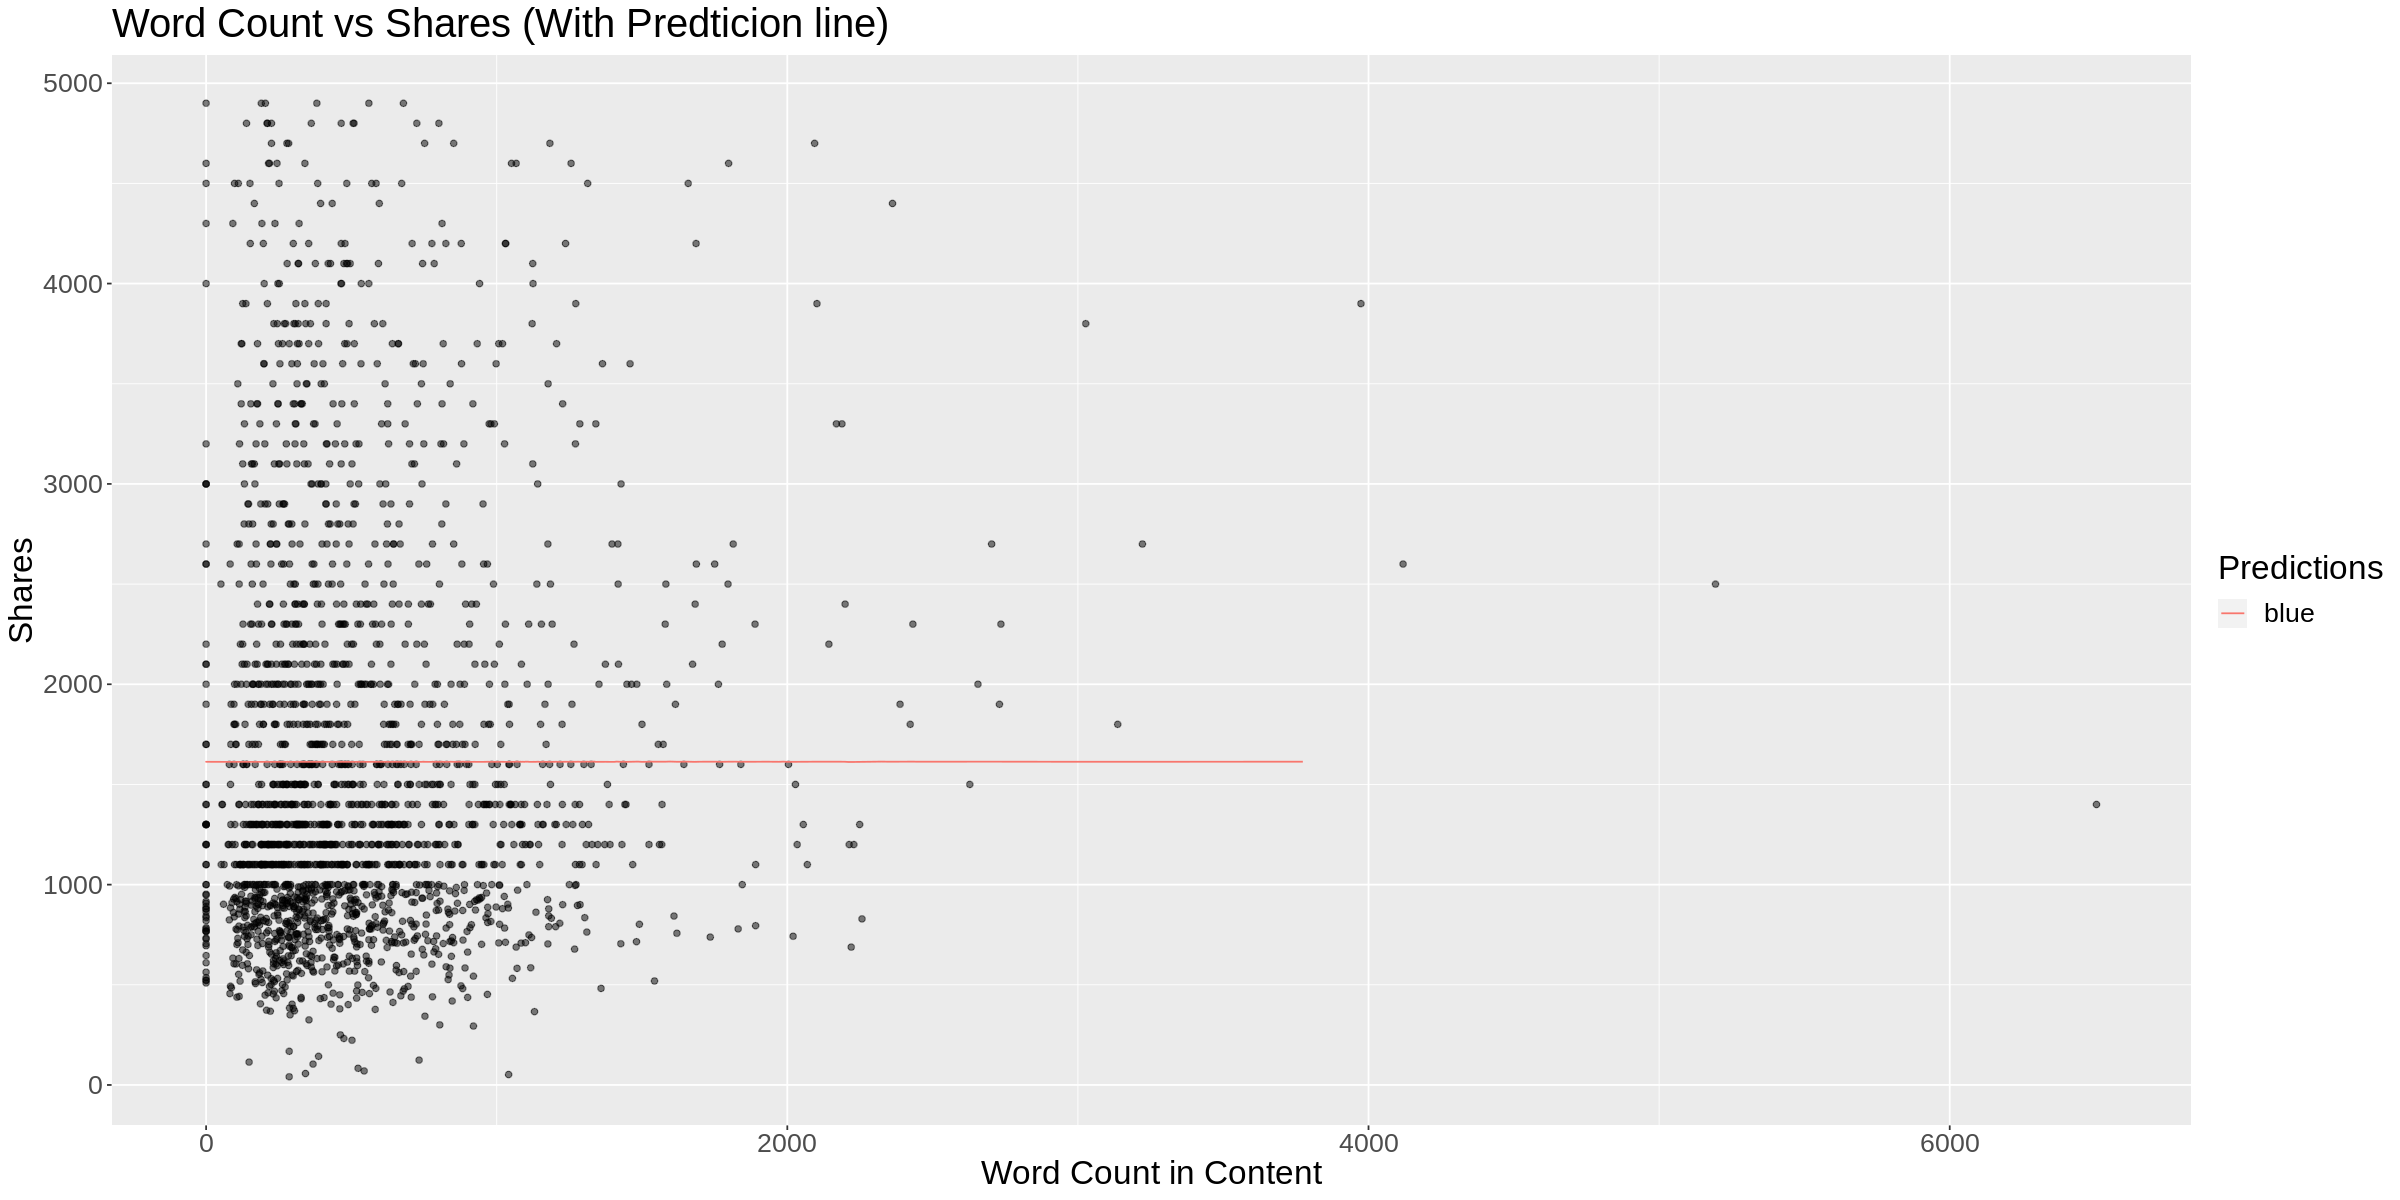

In [12]:
set.seed(9)
options(repr.plot.width = 20 , repr.plot.height =10)
predictions_plot <- popularity_train |> 
ggplot(aes(x = n_tokens_content , y = shares )) + geom_point(alpha = .5) +
geom_line(data = popularity_predictions , aes(x = n_tokens_content , y = .pred, color = "blue")) +
labs(x = "Word Count in Content" , y = "Shares", color = "Predictions")+
ggtitle("Word Count vs Shares (With Predticion line)") + theme(text = element_text(size = 20))
predictions_plot